<a href="https://colab.research.google.com/github/Bryan0122/Analitica-de-datos/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-08 15:37:54--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 74.125.204.113, 74.125.204.100, 74.125.204.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-24-docs.googleusercontent.com/docs/securesc/800jbt7micnaai2p8k7u09dm7cas8r73/7bft24ujj12poeqj7ok3m9eka4f37m6a/1588952250000/11146100322577758036/16627330257682768384Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-08 15:37:54--  https://doc-0s-24-docs.googleusercontent.com/docs/securesc/800jbt7micnaai2p8k7u09dm7cas8r73/7bft24ujj12poeqj7ok3m9eka4f37m6a/1588952250000/11146100322577758036/16627330257682768384Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0s-24-docs.googleusercontent.com (doc-0s-24-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to 

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

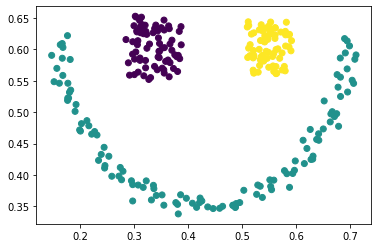

In [5]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:2.2169039249420166sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


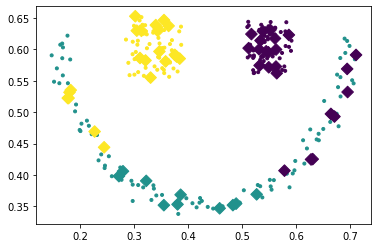

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:2.2510366439819336sg
Ari: 1.0 y accuracy: 1.0


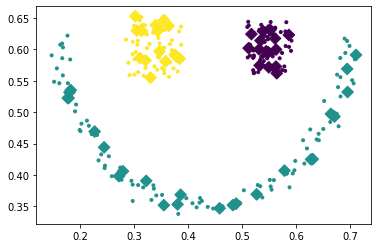

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.9576425552368164sg
Ari: 1.0 y accuracy: 1.0


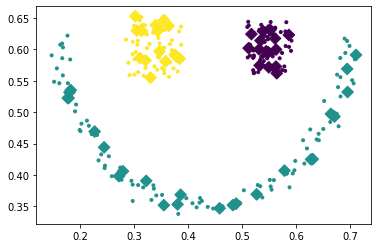

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=40,learning_rate=0.001,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:0.974083662033081sg
Ari: 1.0 y accuracy: 1.0


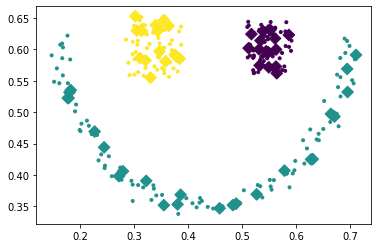

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,optimization='Adam',reduction_='SC')
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:1.013049840927124sg
Ari: 1.0 y accuracy: 1.0


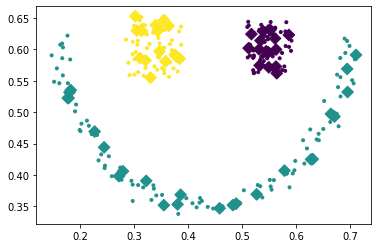

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,optimization='Nadam',reduction_='SC')
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.0473785400390625sg
Ari: 0.38485033598045204 y accuracy: 0.7407407407407407


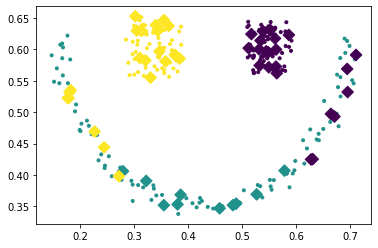

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.06707215309143066sg
Ari: 1.0 y accuracy: 1.0


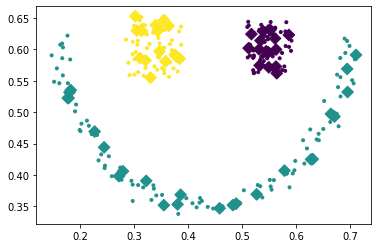

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

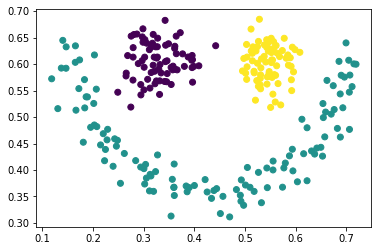

In [87]:
noise = np.random.normal(0,1,happy.shape)
noisy_happy=happy+noise*0.02
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

/content/PRI/main_functions.py:298: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:298: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:3.3529579639434814sg
Ari: 1.0 y accuracy: 1.0


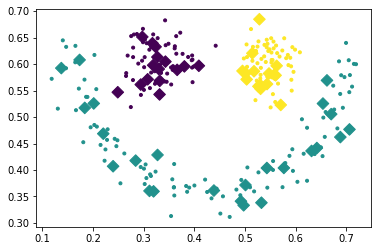

In [89]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=5,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

el tiempo requerido fue:0.061254262924194336sg
Ari: 0.8302189001601709 y accuracy: 0.9444444444444444


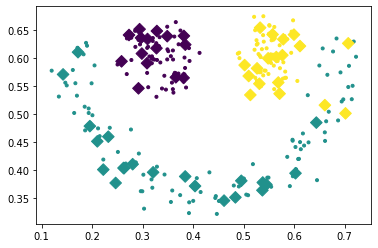

In [46]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

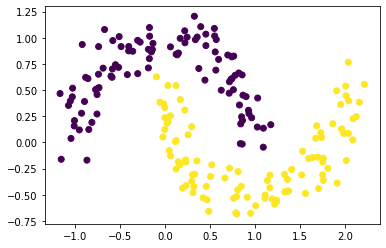

In [50]:
from sklearn import  datasets
noisy_moons,labels_moons = datasets.make_moons(n_samples=200, noise=.125)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

el tiempo requerido fue:0.7344675064086914sg
Ari: 0.5517241379310345 y accuracy: 0.875


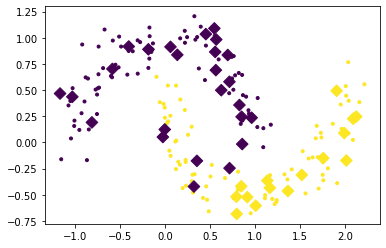

In [86]:
t = time.time()
p = PRI(lambda_=5, n_clusters=2, nn=1, sigma_initial=10,reduction_='SC',prediction='Div')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

el tiempo requerido fue:4.042823314666748sg
Ari: 0.0 y accuracy: 0.5


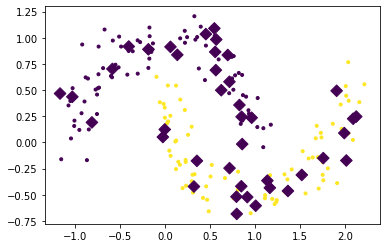

In [83]:
t = time.time()
p = SC(n_clusters_=2, gamma_=500, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))